In [39]:
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.phonon import bandstructure
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.ext.matproj import MPRester

In [40]:
mp_key = "jBtrGioeefhRZ0bpN5xCDp8bQrH6O0HK"
mp_id = "mp-30459"

# Téléchargement structure bande de phonons ScNiBi

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Structure des bandes de phonons


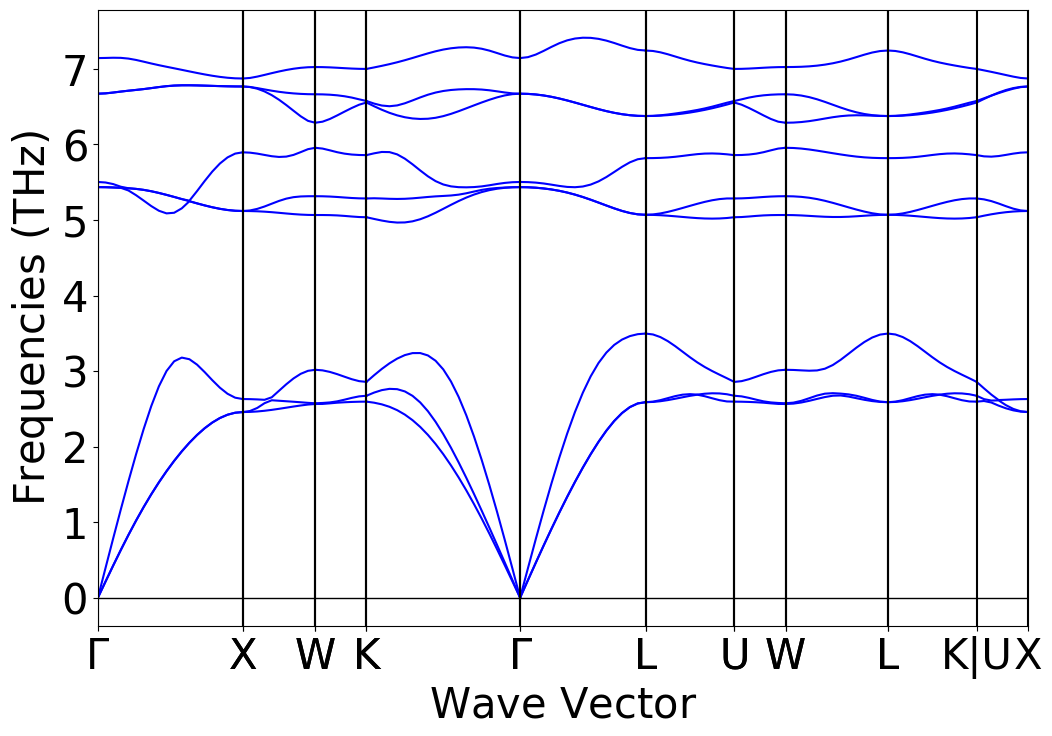

Zone de brillouin du parcours


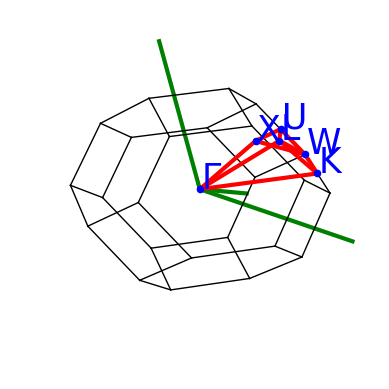

In [41]:
with MPRester(mp_key) as m:
    el_ph = m.get_phonon_bandstructure_by_material_id(mp_id)
    
print("Structure des bandes de phonons")
PhononBSPlotter(el_ph).show()
print("Zone de brillouin du parcours")
PhononBSPlotter(el_ph).plot_brillouin()

# Vitesse son
Pour calculer la vitesse du son le long de chaque branche acoustique, on doit d'abord trouver les bandes où la fréquence du phonon est nulle au centre de la zone de Brillouin.Cette condition permet d'identifier les modes de dispersion minimale des phonons, qui correspondent au comportement linéaire caractéristique du son dans le matériau.

Dans notre cas, il est possible de les identifier visuellement ; les directions possibles pour ces branches acoustiques sont : Γ-X, K-Γ et Γ-L.

La vitesse du son est déterminée par la formule $v = |\frac{dw}{dq}| = |\frac{2\pi df}{dq}|$ 
où ω représente la fréquence angulaire, f la fréquence, et q le vecteur d'onde.

Pour chaque branche acoustique, il faut calculer la pente de la tangente à cette branche pour une fréquence nulle, dans la direction choisie. Cette pente correspond à la vitesse du son le long de la branche acoustique.


## Direction T-X - Premiere bande

La vitesse du son dans la direction T - X vaut : 2507.1715434208063 m/s


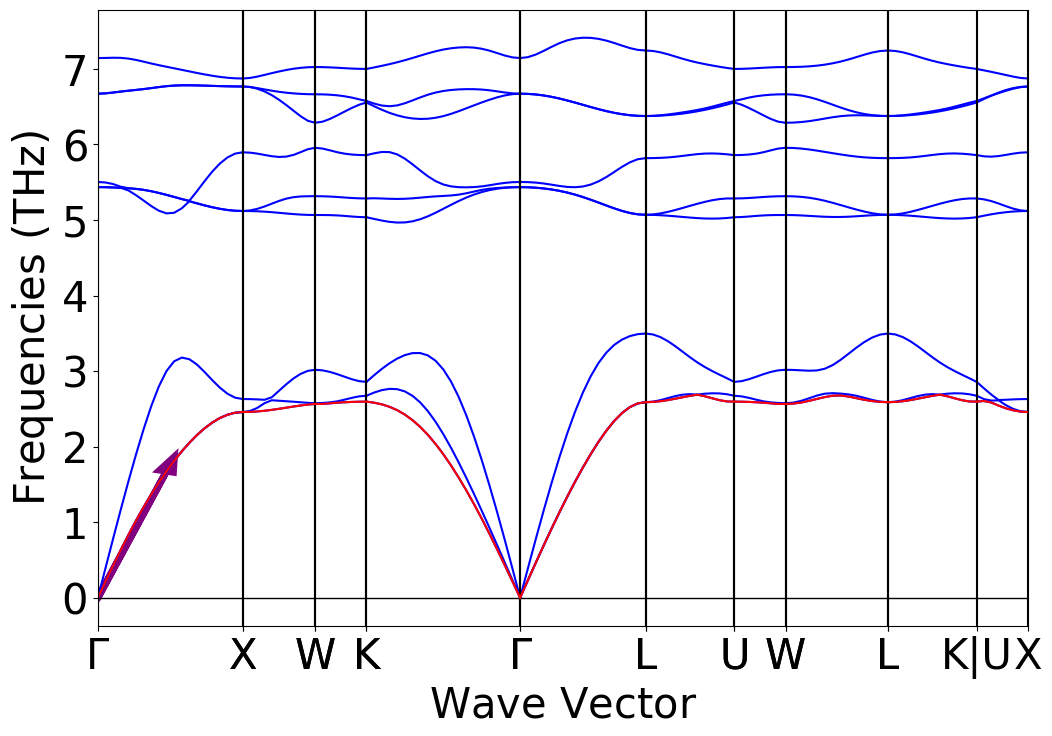

In [42]:
data = PhononBSPlotter(el_ph).bs_plot_data() 
q = data.get("distances")
f = data.get("frequency")
PhononBSPlotter(el_ph).get_plot()

#colorer la bande étudiee
for i in range(len(q)):
    plt.plot(q[i], f[i][0], color = 'red')
    
plt.arrow(q[0][0], f[0][0][0], q[0][9] - q[0][0], f[0][0][9] - f[0][0][0], color='purple', lw=5, head_width=0.1, head_length=0.2)
#multiplier par un facteur 10^2 car f en THz et vecteur d'onde en angstrom 
v = 2*np.pi*np.abs((f[0][0][1]-f[0][0][0])*(10**2))/(q[0][1]-q[0][0])
print("La vitesse du son dans la direction T - X vaut :", v, "m/s")

## Direction K-T - Deuxième bande

La vitesse du son dans la direction K - T vaut : 2721.750363691865 m/s


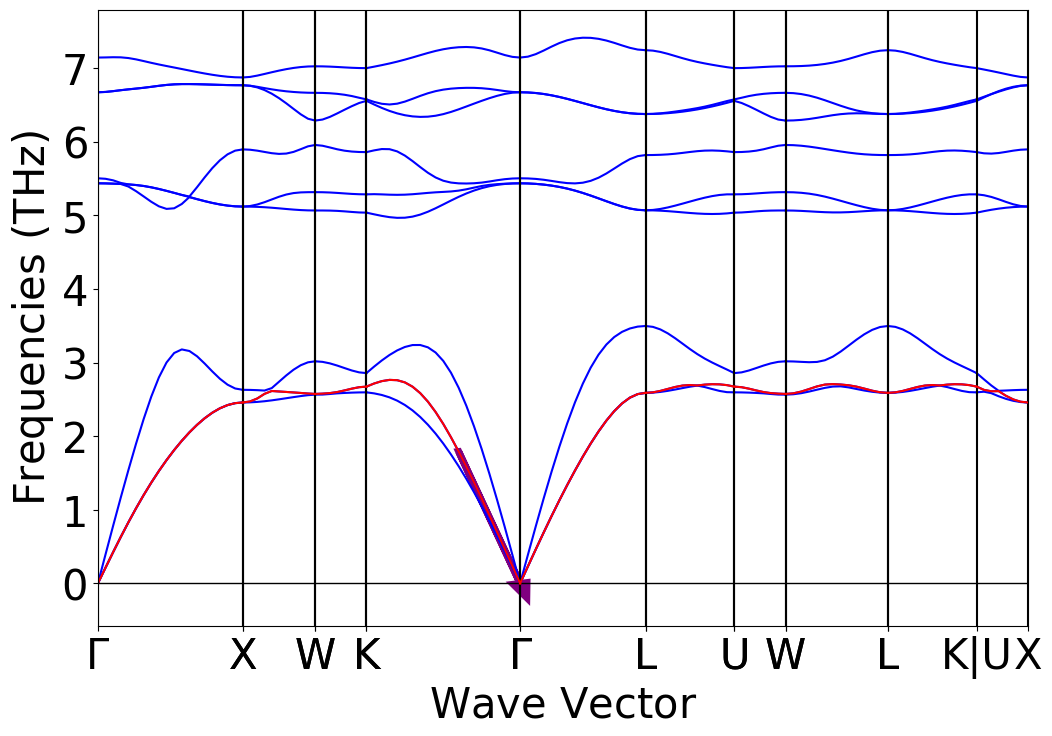

In [43]:
PhononBSPlotter(el_ph).get_plot()
#colorer la bande étudiee
for i in range(len(q)):
    plt.plot(q[i], f[i][1], color = 'red')
    
plt.arrow(q[3][12], f[3][1][12], q[3][-1] - q[3][12], f[3][1][-1] - f[3][1][12], color='purple', lw=5, head_width=0.1, head_length=0.2)

v = 2*np.pi*np.abs((f[3][1][-1]-f[3][1][-2])*(10**2))/(q[3][-1]-q[3][-2])
print("La vitesse du son dans la direction K - T vaut :", v, "m/s")

## Direction T-L - Troisième bande

La vitesse du son dans la direction T - L vaut  4454.702155408336  m/s.


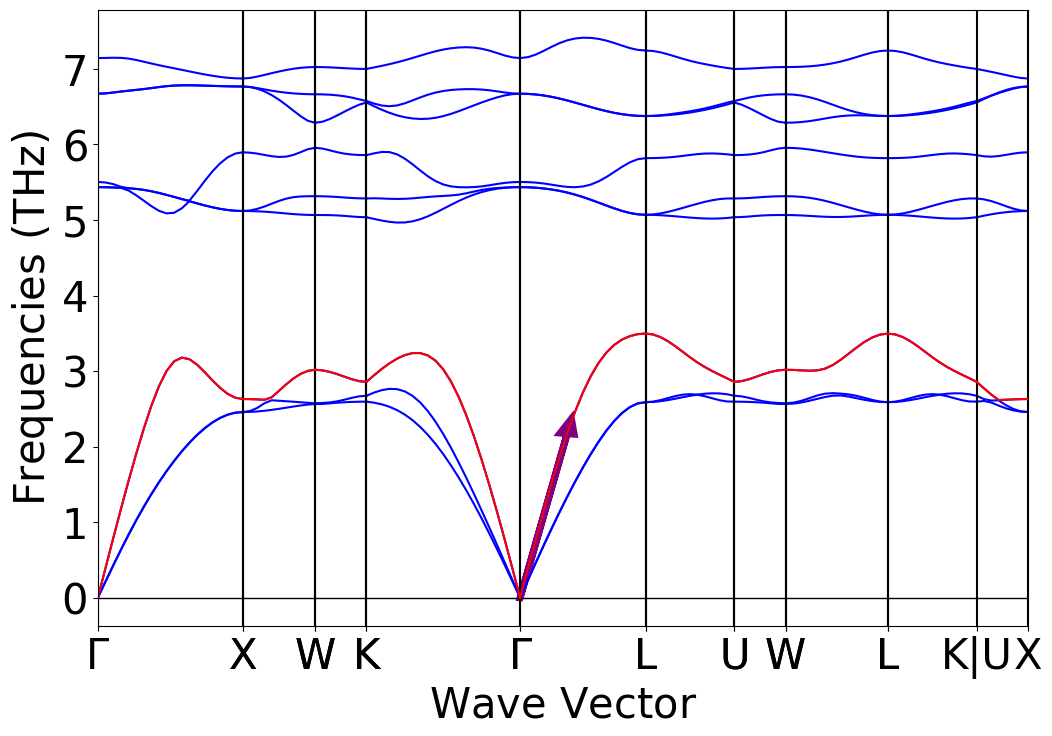

In [44]:
PhononBSPlotter(el_ph).get_plot()
#colorer la bande etudiee
for i in range(len(q)):
    plt.plot(q[i], f[i][2], color = 'red')
    
plt.arrow(q[4][0], f[4][2][0], q[4][6] - q[4][0], f[4][2][6] - f[4][2][0], color='purple', lw=5, head_width=0.1, head_length=0.2)
v = 2*np.pi*np.abs((f[4][2][1]-f[4][2][0])*(10**2))/(q[4][1]-q[4][0])
print("La vitesse du son dans la direction T - L vaut ",v," m/s.")

# Analyse

Les deux premières branches ont une pente et vitesse similaire tandis que la derniere branche possède une pente plus grande et donc par conséquent également une vitesse plus grande. La visualisation correpond aux calculs.